# Pre-Run Setup

### Import Libraries

In [1]:
from qiskit import *
import os
import datetime
import numpy as np
from datetime import date
#you have to load some account to start


/home/haimeng/anaconda3/envs/IBM_scheduler/lib/python3.7/site-packages/qiskit/validation/fields/custom.py:76: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numpy.integer, numpy.float,
/home/haimeng/anaconda3/envs/IBM_scheduler/lib/python3.7/site-packages/qiskit/quantum_info/operators/pauli.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  

In [2]:
import random
import os

In [3]:
# IBMQ.disable_account() 
# IBMQ.disable_account()
token0 = '316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed'
provider = IBMQ.enable_account(token0)

### Specify the files that need to be run 
The old setup works with only one folder.

In [4]:
def shuffle_qasms(qasmlist):
    def get_time(filename):
        idgate = filename.split('/')[-1].split('_')[8].split('=')[-1]
        return idgate
    print(get_time(qasmlist[0]))
    times = list(set([get_time(x) for x in qasmlist])) #remove duplicates
    times.sort()
    print('# of time instances=%d'%(len(times)))
    random.shuffle(times) #randomize the timesteps
    print(times)
    sorted_qasm_list = []
    for time in times:
        sorted_qasm_list += [f for f in qasmlist if get_time(f) == time]
    return sorted_qasm_list

In [5]:
import glob
from datetime import date
circuitPath = r"../../../Circuits"
device = "ibmq_athens"
datestr = "20210625"
runtypes = [f.name for f in os.scandir(circuitPath + '/' + device + '/' + datestr) if f.is_dir() and '_Zminus' in f.name and 'Long' in f.name and 'Spec' in f.name]
batchFiles = []


# TetraStates = ['tetra%d'%(i) for i in range(4)]
# TetraStates.append('randomState')
PrepStates = ['XplusState','XminusState','tetra0','YplusState','YminusState']
runtype = [item  for i in range(5) for item in runtypes if item.split('_')[2]==PrepStates[i] ]
runtypes_ordered = sorted(runtype,key=lambda t:t.split('_')[3],reverse=True)

In [6]:
runtypes_ordered

['SpecMeasMainqFreeLong_Q0_tetra0_QS4_ZminusState',
 'SpecMeasMainqFreeLong_Q0_tetra0_QS3_ZminusState',
 'SpecMeasMainqFreeLong_Q0_tetra0_QS2_ZminusState',
 'SpecMeasMainqFreeLong_Q0_tetra0_QS1_ZminusState',
 'SpecMeasMainqFreeLong_Q0_tetra0_QS0_ZminusState']

In [7]:
for runtype in runtypes_ordered:
    qasmpath = circuitPath + '/' + device + '/'+ datestr + '/' + runtype + '/'
    qasmlist = glob.glob(qasmpath + '%s*.qasm'%(runtype.split('_')[0]))
    # sort by id gates
    qasmlist.sort(key=lambda x: int(x.split('/')[-1].split('_')[8].split('=')[-1]))
    print(len(qasmlist))
    f=qasmlist[0]
    print(f)
    QuantumCircuit().from_qasm_file(f).draw(output='mpl')
    sorted_qasm_list = shuffle_qasms(qasmlist)
    # add measurement error mitigation
    meas_qasm = glob.glob(qasmpath + '%s*.qasm'%('MeasError'))
    sorted_qasm_list += meas_qasm
    print(len(sorted_qasm_list))
    batchFiles += [sorted_qasm_list]

72
../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS4_ZminusState/SpecMeasMainqFreeLong_Q0_tetra0_QS4_ZminusState_20210625_ibmq_athens_numIdGates=0_obsY.qasm
0
# of time instances=24
['2736', '432', '1440', '1728', '144', '3024', '2304', '720', '1584', '3168', '3312', '2592', '2016', '0', '1296', '576', '1152', '2880', '2448', '1872', '864', '288', '2160', '1008']
74
72
../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS3_ZminusState/SpecMeasMainqFreeLong_Q0_tetra0_QS3_ZminusState_20210625_ibmq_athens_numIdGates=0_obsZ.qasm
0
# of time instances=24
['2736', '720', '1296', '1872', '1440', '144', '432', '3168', '2448', '2304', '2592', '1008', '1584', '3312', '288', '864', '2016', '3024', '1728', '0', '576', '2160', '2880', '1152']
74
72
../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS2_ZminusState/SpecMeasMainqFreeLong_Q0_tetra0_QS2_ZminusState_20210625_ibmq_athens_numIdGates=0_obsZ.qasm
0
# of time instances=24
['576

In [8]:
for i in range(5):
    print(batchFiles[i][0])

../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS4_ZminusState/SpecMeasMainqFreeLong_Q0_tetra0_QS4_ZminusState_20210625_ibmq_athens_numIdGates=2736_obsY.qasm
../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS3_ZminusState/SpecMeasMainqFreeLong_Q0_tetra0_QS3_ZminusState_20210625_ibmq_athens_numIdGates=2736_obsY.qasm
../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS2_ZminusState/SpecMeasMainqFreeLong_Q0_tetra0_QS2_ZminusState_20210625_ibmq_athens_numIdGates=576_obsX.qasm
../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS1_ZminusState/SpecMeasMainqFreeLong_Q0_tetra0_QS1_ZminusState_20210625_ibmq_athens_numIdGates=3024_obsY.qasm
../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS0_ZminusState/SpecMeasMainqFreeLong_Q0_tetra0_QS0_ZminusState_20210625_ibmq_athens_numIdGates=3168_obsX.qasm


../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS0_ZminusState/SpecMeasMainqFreeLong_Q0_tetra0_QS0_ZminusState_20210625_ibmq_athens_numIdGates=0_obsX.qasm


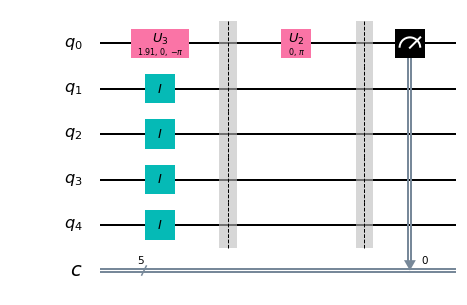

In [13]:
runtype = runtypes_ordered[4]
qasmpath = circuitPath + '/' + device + '/'+ datestr + '/' + runtype + '/'
qasmlist = glob.glob(qasmpath + '%s*.qasm'%(runtype.split('_')[0]))
# sort by id gates
qasmlist.sort(key=lambda x: int(x.split('/')[-1].split('_')[8].split('=')[-1]))
f=qasmlist[0]
print(f)
QuantumCircuit().from_qasm_file(f).draw(output='mpl')

In [14]:
for i in range(5):
    print(batchFiles[i][0].split('/')[-1].split('_')[2])

tetra0
tetra0
tetra0
tetra0
tetra0


In [15]:
tokens = {'haimeng@usc.edu':'316cca1ff42067b9901b6a9e90ca76496e76b4a73139954176c6fe31a45572fcd37089924cbe5c41edb96a9b4c0e92e44451ed350e2a7e45dc809d26cd752eed',
          'pokharel@usc.edu' : '21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3',
          'zhanghaimeng1994@gmail.com':'3513ac2a5100793f7e44bf520ad54b2d7bb68da03cd0f410a3bea14853644e1841de6ce86fbee2a750f814f032584d002f601fe25360b446f81339ba3a957eed',
          'theireasychair@gmail.com':'c59327488ff0575f9fcafd3f8d8ad627a1574fcf130508ac0314f08af78afc5cc5787acd7527140cb8aeacceaf4eaf82960785df5636991287d4f086db3b7229',
          'theireasychair@icloud.com':'e009883c3a103e728b741783f67d8586a37c0de04447151aa9493d13b3e76518f135424c482d9be2ef02759194085c8dce0db926f392ef5caa5b66f2843025a3',
          'jinweixu@stanford.edu':'21a7ae9539b78959e11dcc1383c5691767f36b13d5d8efa01e515b76714b796903c19a61537adf98583e1cb04e4ee2584c6ba5f632b9a16cb8ad80cc6ce90ba7'}

### Specify API and Backend

This script checks for how many jobs are available per token.

In [16]:
#write the email address corresponding to each API, this will help when these APIs expire
apiDict = tokens
apiInv =dict(map(reversed, apiDict.items()))
apitokens = list(apiDict.values())


for token in apitokens:
    IBMQ.disable_account() #Start with no account loaded
    provider = IBMQ.enable_account(token) #Some account must be loaded before we start
    backend = provider.backends.ibmq_athens
    available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
    print(f"{available_jobs} jobs available for {apiInv[token]}")



5 jobs available for haimeng@usc.edu
4 jobs available for pokharel@usc.edu
5 jobs available for zhanghaimeng1994@gmail.com
5 jobs available for theireasychair@gmail.com
5 jobs available for theireasychair@icloud.com
1 jobs available for jinweixu@stanford.edu


In [17]:
backend.configuration() #max_experiments=75, max_shots=8192
max_experiments=backend.configuration().max_experiments
max_shots=backend.configuration().max_shots
print(max_experiments,max_shots)

75 8192


## print backend info

In [18]:
prop=backend.properties()
type(prop)

qiskit.providers.models.backendproperties.BackendProperties

In [19]:
prop.qubit_property(1)

{'T1': (7.638170814181626e-05, '2021-06-26T01:29:32Z'),
 'T2': (0.00012750274620084817, '2021-06-25T04:09:19Z'),
 'frequency': (5267216853.902746, '2021-06-26T01:52:57Z'),
 'anharmonicity': (-332545044.12181485, '2021-06-26T01:52:57Z'),
 'readout_error': (0.01200000000000001, '2021-06-25T04:05:09Z'),
 'prob_meas0_prep1': (0.017199999999999993, '2021-06-25T04:05:09Z'),
 'prob_meas1_prep0': (0.0068, '2021-06-25T04:05:09Z'),
 'readout_length': (3.0222222222222225e-06, '2021-06-25T04:05:09Z')}

# Run the circuits

### Function to import backend and token information during the runs

In [20]:
# print current working directory
print(os.getcwd())

/home/haimeng/LocalProjects/IBM-PMME/IBM_data/job_submission/20210625


In [21]:
import csv
import os

runRecords = '../../../Data/records/info/' #information about each job is stored in this folder

def exportJobInfo(usertoken,jobid,filenames,backend):
    global runRecords
    now = datetime.datetime.now()
    qindex = int(filenames[0].split('/')[-1].split('_')[1][-1])
    with open(runRecords+jobid + '_' +usertoken+'.csv','w+') as f:
        writer = csv.writer(f,delimiter=',')
        writer.writerow(['token',token])
        writer.writerow(['jobid',jobid])
        writer.writerow(['backend',backend.properties().backend_name])
        writer.writerow(['qubit',qindex])
        prop = backend.properties().qubit_property(qindex)
        for key,value in prop.items():
            writer.writerow([key,value])
        writer.writerow(['circuits'])
        for item in filenames:
            writer.writerow([item])
        # write time stamps
        job = backend.retrieve_job(runId)
        writer.writerow(['job_creation',job._time_per_step['CREATING']])
        

In [22]:
backend_info = backend.properties().to_dict() 
backend_info['backend_name']

'ibmq_athens'

### Function to check for available tokens

In [23]:

 
#Select a available token to send the run to
#With the current setup, loading and unloading a token takes sometime
#sequentially check each token for availability will increase loadtime for tokens that are near the end
#so given a list of tokens, everytime a job is sent to a token, that token will be sent to the end
def availableToken():
    global provider, backend, apitokens
    token = apitokens[0]
    available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
    if available_jobs > 1:
        print(f'{available_jobs} jobs available for {apiInv[token]}')
        return token

    #if the first token has no availability then we will continue below
    apitokens.append(apitokens.pop(0))
    for token in apitokens:
        IBMQ.disable_account() 
        provider = IBMQ.enable_account(token) 
        backend = provider.backends.ibmq_athens
        available_jobs = backend.job_limit().maximum_jobs - backend.job_limit().active_jobs
        if available_jobs > 1:
            print(f'{available_jobs} jobs available for {apiInv[token]}')
            apitokens.insert(0, apitokens.pop(apitokens.index(token)))
            return token

availableToken()   
      

4 jobs available for pokharel@usc.edu


'21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3'

### Actually doing the runs

In [24]:
#start with empty containers
#dont run this block if you already have a list of runs you want to continue

runDict = {} #matches each batch to the job token
jobDict = {} #matches each batch to the entire job object
jobsFound = set([]) #status is updated when checked
jobsDone = set([])

In [25]:
backend.properties().backend_name

'ibmq_athens'

In [26]:
#start runs
#generally we want to run all the batchFiles, but we can also choose to run only some of them:
#todoFiles = [batchFiles[3]]
jobsNotFound = list(set(range(0, len(batchFiles))) - jobsFound)

# todoFiles = batchFiles[0::]
# for runFiles in todoFiles:
for n in jobsNotFound[0::]:
    
    runFiles = batchFiles[n]
    token = availableToken()

    allQasmList = [QuantumCircuit.from_qasm_file(file) for file in runFiles] #this needs to edited if the batch files also contain directory
    allCircuits= assemble(allQasmList, backend, shots=8192)

    job_current = backend.run(allCircuits)
    print(job_current.status())

    runId = job_current.job_id()
#     runTokens.append(token)
#     runIds.append(runId)
#         runDict[batchFiles.index(runFiles)] = [token, runId] #note that the index still refers to the original batchFiles
    runDict[n] = [token, runId]
    #as retrieve job is not working temporarily I will save job_current in a dictionary as well
#     jobDict[batchFiles.index(runFiles)] = job_current
    jobDict[n] = job_current
    print(f"Batch {batchFiles.index(runFiles)} has been sent")

    exportJobInfo(token, runId, batchFiles[0], backend)


print(runDict)

4 jobs available for pokharel@usc.edu
JobStatus.VALIDATING
Batch 0 has been sent
3 jobs available for pokharel@usc.edu
JobStatus.VALIDATING
Batch 1 has been sent
2 jobs available for pokharel@usc.edu
JobStatus.VALIDATING
Batch 2 has been sent
5 jobs available for zhanghaimeng1994@gmail.com
JobStatus.VALIDATING
Batch 3 has been sent
4 jobs available for zhanghaimeng1994@gmail.com
JobStatus.VALIDATING
Batch 4 has been sent
{0: ['21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3', '60d68d88a1965212a0223d57'], 1: ['21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3', '60d68deaa2cdafc1d815961a'], 2: ['21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3', '60d68e4c5e60c60ee4ad5754'], 3: ['3513ac2a5100793f7e44bf520ad54b2d7bb68da03cd0f410a3bea14853644e1841de6ce86f

In [27]:
runDict

{0: ['21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3',
  '60d68d88a1965212a0223d57'],
 1: ['21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3',
  '60d68deaa2cdafc1d815961a'],
 2: ['21acf454868c89a86938ffcb6b17cc1236f783c6e340937ab3205598608408623893094770f403dd95ba758d9864ef2135eda8f381804787e15e8ab2aedd3ba3',
  '60d68e4c5e60c60ee4ad5754'],
 3: ['3513ac2a5100793f7e44bf520ad54b2d7bb68da03cd0f410a3bea14853644e1841de6ce86fbee2a750f814f032584d002f601fe25360b446f81339ba3a957eed',
  '60d68eafd657d6abc639e0ef'],
 4: ['3513ac2a5100793f7e44bf520ad54b2d7bb68da03cd0f410a3bea14853644e1841de6ce86fbee2a750f814f032584d002f601fe25360b446f81339ba3a957eed',
  '60d68f13d2f1e4d67f255ddb']}

### Checking job status

In [32]:
# import sleep
jobsNotDone = list(set(runDict.keys()) - jobsDone)

def loadToken(token):
    global provider, backend
    if(not IBMQ.active_account()):
        IBMQ.load_account()
    IBMQ.disable_account() 
    provider = IBMQ.enable_account(token) 
    backend = provider.backends.ibmq_athens
    return None

print("|Batch| Q#  | Status")
for job in jobsNotDone:
#     try:
    [token, job_id] = runDict[job]
    loadToken(token)

    #get job from dictionary instead of retrieve job as that function is broken for now
#         job_data = backend.retrieve_job(job_id)
    #alternatively get job from the jobD|ict
    if job in jobDict:
        job_data = jobDict[job]
    else:
        job_data = backend.retrieve_job(job_id)
    #print(f"Batch {job} is {job_data.status()}")

    jobsFound.add(job)
    qno = '---'
    if str(job_data.status()) == 'JobStatus.QUEUED':
        #print(f'queue number is {job_data.queue_info().position}')
        qno = str(job_data.queue_info().position).zfill(3)

    if str(job_data.status()) == 'JobStatus.DONE':
        jobsDone.add(job)

    st = str(job_data.status()).split('.')[1]
    jno = str(job).zfill(3)
    print(f'| {jno} | {qno} | {st}')
#     except:
#         pass

print(f'{len(jobsFound)} jobs found: {jobsFound}')
print(f'{len(jobsDone)} jobs done: {jobsDone}')
# if some batches are showing network errors, run only those batches again
# try, excess commands above force the loop to continue even when some batches show errors

|Batch| Q#  | Status
| 004 | --- | DONE
5 jobs found: {0, 1, 2, 3, 4}
5 jobs done: {0, 1, 2, 3, 4}


# Exporting Data (Run after jobs have completed)

In [33]:
filename = batchFiles[0][-1]
print(filename)
print(os.path.dirname(filename))
run=1


../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS4_ZminusState/MeasError_Mitigate_20210625_ibmq_athens_ZminusState_obsZ.qasm
../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS4_ZminusState


In [34]:
filename

'../../../Circuits/ibmq_athens/20210625/SpecMeasMainqFreeLong_Q0_tetra0_QS4_ZminusState/MeasError_Mitigate_20210625_ibmq_athens_ZminusState_obsZ.qasm'

In [35]:
resultRecords = '../../Data/records/results/'
if not os.path.exists(resultRecords):
        os.makedirs(resultRecords)

#job results are returned a list of dictionaries and they will have the same order as the order of the files in that batch
# filenames given here should also include the folder names as well
def exportBatchJob(filenames, token, job_id, index):
    loadToken(token)
    #job_data = backend.retrieve_job(job_id)
    if job in jobDict:
        job_data = jobDict[job]
        print('found token')
    else:
        job_data = backend.retrieve_job(job_id)
        
    # write finish time
    with open(runRecords+job_id + '_' +token+'.csv','a') as f:
        writer = csv.writer(f,delimiter=',')
        writer.writerow(['job_finish_time',job_data._time_per_step['COMPLETED']])
        
    with open(resultRecords + f'{job_id}_{token}_results.txt', 'w') as f:
        f.write(str(job_data.result().to_dict()))
    
    for i in range(0, len(filenames)):
        result = job_data.result().get_counts()[i]
        exportResult(token, job_id, i, filenames[i], result,index)
        
        
#results will be in the form of dictionary
#filename here should also include the foldernames
def exportResult(token, job_id, circNo, filename, result,index):
#     print(filename)
    directory = os.path.dirname(filename).replace('/Circuits/', '/Data/raw/')+'_%d'%(index)+ f'/run{run}/'
    filename_new = os.path.basename(filename).split('.qasm')[0].split('_')
    
    if 'MeasMainqFree' in filename_new:
        filename_new.insert(5,str(index))
    file = directory + '_'.join(filename_new) + f'_{job_id}.txt'
    if not os.path.exists(os.path.dirname(file)):
        os.makedirs(os.path.dirname(file))
        
    
    with open(file, 'w') as f:
            f.write("usertoken,jobid,circuit_number\n")
            f.write(f"{token},{job_id},{circNo}\n")
            [f.write( '"'+str(key)+'"' + ',' + str(value) + '\n') for key, value in result.items()]
    return None




In [36]:
# batchFilesFull = [ [ inputDir + f for f in batch] for batch in batchFiles] #this wont be necessary if the filename have dir
for job in list(runDict.keys()):
    [token, job_id] = runDict[job]
    #print(runDict[job])
    file = batchFiles[job][0]
    directory = os.path.dirname(file.replace('/Circuits/', '/Data/raw/'))
    if os.path.exists(directory):
        exists = os.listdir(directory)
        run = 1 + len(exists)
        print(run)
    else:
        run =1
    exportBatchJob(batchFiles[job], token, job_id,index=job)
    print(f"job {job} has been exported")

found token
job 0 has been exported
found token
job 1 has been exported
found token
job 2 has been exported
found token
job 3 has been exported
found token
job 4 has been exported
